In [1]:
#Mellin transform

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals
import itertools
import scipy.linalg as LA
import random

def kplaplacian_mlf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -pow(k,-1*lam)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [2]:
def kplaplacian_ltf(G,lam):
    nodes = G.nodes()
    nodelist = list(itertools.combinations(nodes,2))
    nsize    = len(nodes)
    L = np.zeros(shape=(nsize,nsize))
    for n in nodelist:
        k = nx.shortest_path_length(G, source=n[0], target=n[1])
        if k==1:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -1
        else:
            L[n[0]-1,n[1]-1]= L[n[1]-1,n[0]-1]= -np.exp(-lam*k)
    row,col = np.diag_indices_from(L)
    L[row,col] = -L.sum(axis=1)
    return L

In [3]:
#given the Laplacian matrix L, compute the normalised version
def normalised_genlap(L):
    D = np.diagonal(L)                # extract the diagonal elements which correspond to the degree
    D = [pow(d,-0.5) for d in D]      # compute d^(-1/2) for each of the degrees
    D_hf = np.diag(D)                 # form a square matrix D^(-1/2)
    Df = np.matmul(D_hf, L)           # compute D^(-1/2) L
    Ln = np.matmul(Df,D_hf)           # compute D^(-1/2) L D^(-1/2)
    return Ln                         # return normalised Laplacian

In [6]:
#Generating BA graphs

n=500
m=5
phi_av = []
lg = []
av_lst=[]
time = np.arange(0,10,0.05)
phi_lst = [0] * len(time)
Gi_lst = []

for i in range(20):
    G = nx.barabasi_albert_graph(n, m, seed=None)     #Create Barabasi network
    while (nx.is_connected(G)==False):                # check if network is connected
        G = nx.barabasi_albert_graph(n, m, seed=None)
    degrees = 2*G.number_of_edges()
    phi_av.append(degrees/len(G.nodes()))
    Gi_lst.append(G)  

In [7]:
Lap_lstn = []

for G in Gi_lst:    
    L = nx.normalized_laplacian_matrix(G).todense()   # to cater for no longrange interactions
    D, V = LA.eigh(L)
  
    ln = len(D);
    alp_v = []
    phi_t = []
    av_t=[]
    for j in range(ln):
        vsum = V[:, j].sum()
        alp_v.append(pow(vsum,2))
        
    for t in time:
        s = 0
        av = 0
        for k in range(ln):
            ss = alp_v[k]*np.exp(-t*D[k])
            s = s+ ss
            #av = av+(D[k]*ss)
        phi_t.append(s)
        #av_t.append(-1*av)
        
    Lap_lstn.append(phi_t)
Lap_lstn = [sum(x) for x in zip(*Lap_lstn)]
Lap_lstn = np.multiply(Lap_lstn, (1.0/len(Gi_lst)))

In [8]:
Lap_lst = []
lam_lst = [1,1.5,2,3,4]
leg = []

#Lap_lst.append(phi_lst)
for lam in lam_lst:
    phi_lstn = []
    phi_lst = []
    for G in Gi_lst:    
        #degrees = 2*G.number_of_edges()
        #phi_av.append(degrees/len(G.nodes()))

        L = kplaplacian_ltf(G,lam)   # to cater for no longrange interactions
        D, V = LA.eigh(normalised_genlap(L))

        ln = len(D);
        alp_v = []
        phi_t = []
        av_t=[]
        for j in range(ln):
            vsum = V[:, j].sum()
            alp_v.append(pow(vsum,2))

        for t in time:
            s = 0
            av = 0
            for k in range(ln):
                ss = alp_v[k]*np.exp(-t*D[k])
                s = s+ ss
                #av = av+(D[k]*ss)
            phi_t.append(s)
            #av_t.append(-1*av)

        phi_lst.append(phi_t)
        #av_lst.append(av_t)
        #lg.append('Ave'+str(phi_av[i]))
    phi_lstn = [sum(x) for x in zip(*phi_lst)]
    Lap_lst.append(np.multiply(phi_lstn, (1.0/len(Gi_lst))))

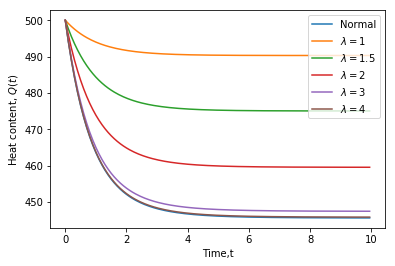

In [40]:
leg = []
plt.plot(time,Lap_lstn)
leg.append('Normal')

for i in range(len(Lap_lst)):
    plt.plot(time,Lap_lst[i])
    leg.append('$\lambda=$'+str(lam_lst[i]))

plt.ylabel('Heat content, $Q(t)$')
plt.xlabel('Time,t') 
plt.legend(leg)
#plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/BA-ERheatcontent.eps', format='eps', dpi=1000)
plt.show()

In [41]:
#Generating ER graphs

n=500
p=0.015
phi_av = []
lg = []
av_lst=[]
time = np.arange(0,10,0.05)
phi_lst = [0] * len(time)
Gi_lst = []

for i in range(50):
    G = nx.barabasi_albert_graph(n, m, seed=None)     #Create Barabasi network
    while (nx.is_connected(G)==False):                # check if network is connected
        G = nx.barabasi_albert_graph(n, m, seed=None)
    degrees = 2*G.number_of_edges()
    phi_av.append(degrees/len(G.nodes()))
    Gi_lst.append(G) 

In [42]:
Lap_lstn = []

for G in Gi_lst:    
    L = nx.normalized_laplacian_matrix(G).todense()   # to cater for no longrange interactions
    D, V = LA.eigh(L)
  
    ln = len(D);
    alp_v = []
    phi_t = []
    av_t=[]
    for j in range(ln):
        vsum = V[:, j].sum()
        alp_v.append(pow(vsum,2))
        
    for t in time:
        s = 0
        av = 0
        for k in range(ln):
            ss = alp_v[k]*np.exp(-t*D[k])
            s = s+ ss
            av = av+(D[k]*ss)
        phi_t.append(s)
        av_t.append(-1*av)
        
    Lap_lstn.append(phi_t)
Lap_lstn = [sum(x) for x in zip(*Lap_lstn)]
Lap_lstn = np.multiply(Lap_lstn, (1.0/len(Gi_lst)))

In [ ]:
Lap_lst = []
lam_lst = [1,1.5,2,3,4]
leg = []

#Lap_lst.append(phi_lst)
for lam in lam_lst:
    phi_lstn = []
    phi_lst = []
    for G in Gi_lst:    
        #degrees = 2*G.number_of_edges()
        #phi_av.append(degrees/len(G.nodes()))

        L = kplaplacian_ltf(G,lam)   # to cater for no longrange interactions
        D, V = LA.eigh(normalised_genlap(L))

        ln = len(D);
        alp_v = []
        phi_t = []
        av_t=[]
        for j in range(ln):
            vsum = V[:, j].sum()
            alp_v.append(pow(vsum,2))

        for t in time:
            s = 0
            av = 0
            for k in range(ln):
                ss = alp_v[k]*np.exp(-t*D[k])
                s = s+ ss
                #av = av+(D[k]*ss)
            phi_t.append(s)
            #av_t.append(-1*av)

        phi_lst.append(phi_t)
        #av_lst.append(av_t)
        #lg.append('Ave'+str(phi_av[i]))
    phi_lstn = [sum(x) for x in zip(*phi_lst)]
    Lap_lst.append(np.multiply(phi_lstn, (1.0/len(Gi_lst))))

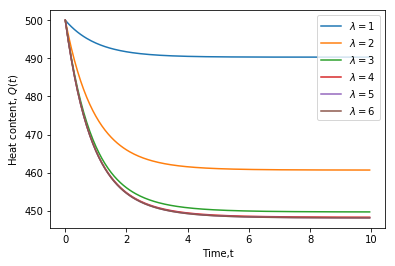

In [92]:
leg = []
plt.plot(time,Lap_lstn)
leg.append('Normal')

for i in range(len(Lap_lst)):
    plt.plot(time,Lap_lst[i])
    leg.append('$\lambda=$'+str(lam_lst[i]))

plt.ylabel('Heat content, $Q(t)$')
plt.xlabel('Time,t') 
plt.legend(leg)
#plt.savefig('/home/alicenanyanzi/RecentProject/Research-Documentation/AliceThesis-Stellenbosch/images/BA-ERheatcontent.eps', format='eps', dpi=1000)
plt.show()

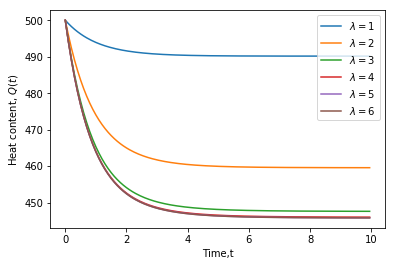

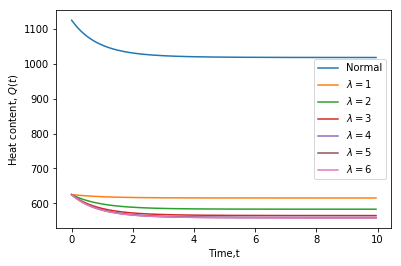

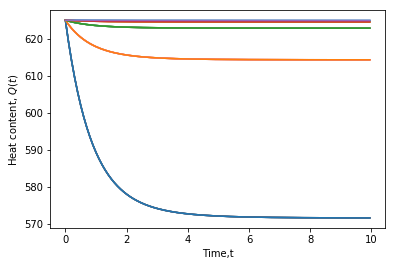

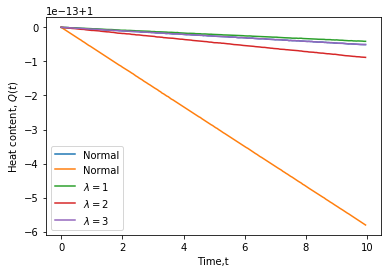

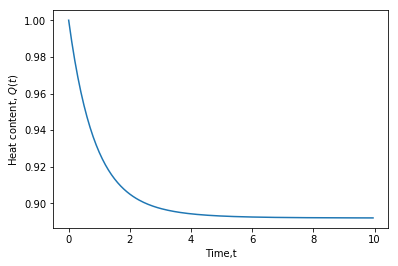

500.00000000000057

0.2

[3, 6, 9, 11]